# Classification

Some examples from https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['figure.figsize'] = (5, 5)

---
## Simulate some clustered 2D data points.

In [4]:
from sklearn.datasets import make_blobs

# xy = 4 clusters of 300 random (x, y) points
# labels = cluster index of each point 0, 1, 2, or 3
xy, labels = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

xy.shape, labels.shape

((300, 2), (300,))

In [5]:
xy[:4,:]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465]])

In [6]:
labels[:4]

array([1, 3, 0, 3])

## Since we simulated these data, we know which category each point belongs to...

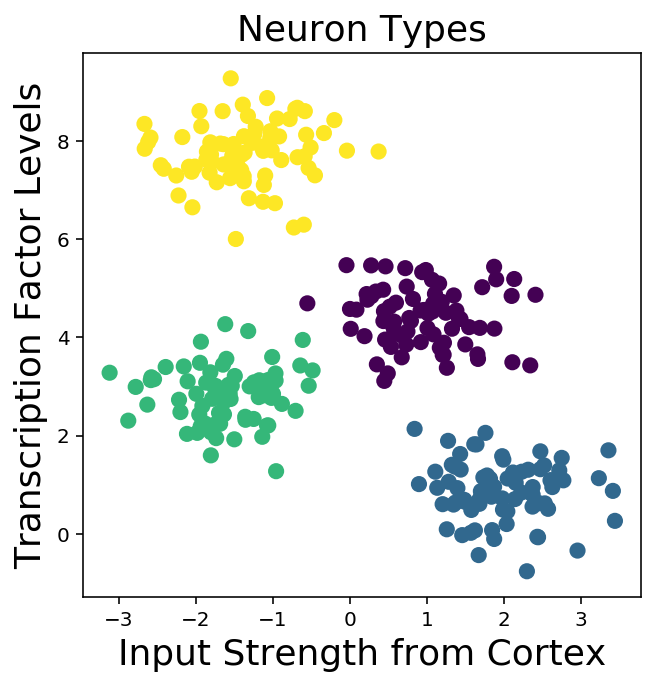

In [23]:
# plot the points colored by cluster label
plt.scatter(xy[:,0], xy[:,1], s=50, c=labels, cmap='viridis');
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('Neuron Types');

## But for real data, we typically don't know that, and it may be one of our jobs to estimate it.

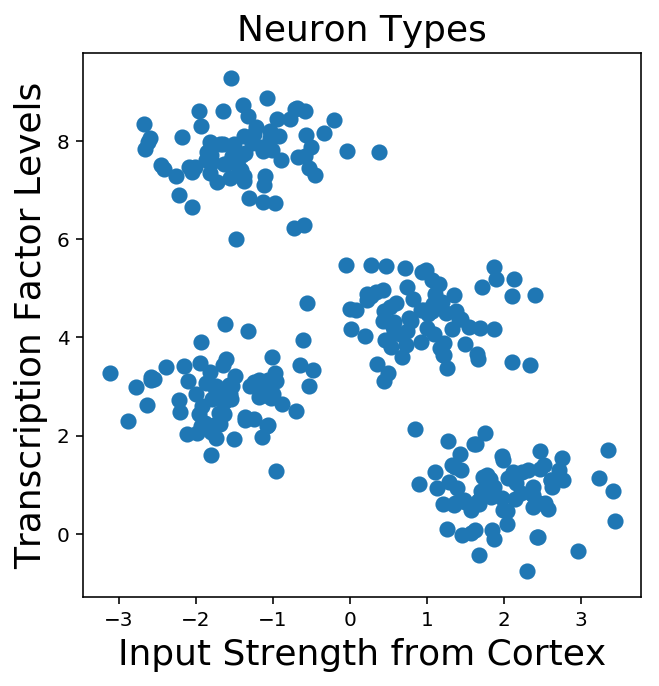

In [24]:
# plot the points without any knowledge of which cluster they belong to
plt.scatter(xy[:,0], xy[:,1], s=50);
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('Neuron Types');

---
# $k$-means clustering

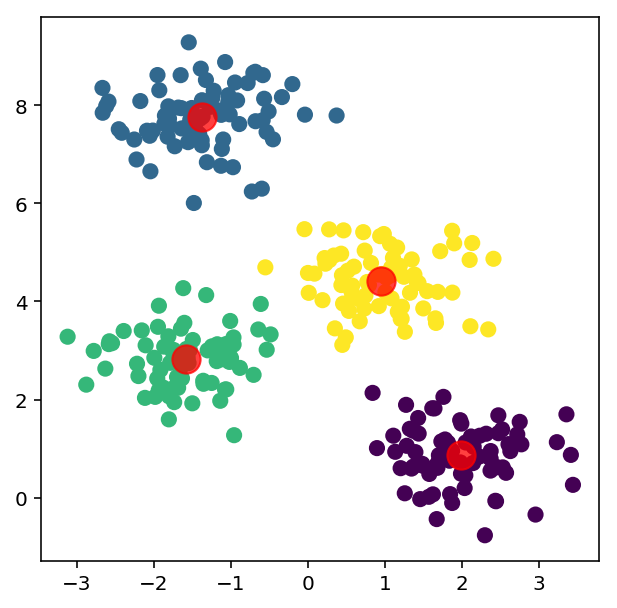

In [25]:
from sklearn.cluster import KMeans

# create an instance of the KMeans class and specify how many clusters it should find
kmeans = KMeans(n_clusters=4)

# run the k-means algorithm to cluster the 300 (x, y) points into the specified number of clusters
kmeans.fit(xy)

# klabels = the cluster index that k-means assigned to each point 0, 1, 2, or 3
klabels = kmeans.predict(xy)

# plot the points colored by cluster label
plt.scatter(xy[:,0], xy[:,1], s=50, c=klabels, cmap='viridis');

# show the cluster centers as red circles
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, alpha=0.75);

## How $k$-means works

1. Choose random cluster centers.
2. Put each data point into the cluster whose center it is closest to.
3. Update the cluster centers to the mean of all points in the cluster.
4. Repeat 2-3 until cluster centers converge (i.e. don't change much anymore).

![kmeans EM algorithm](images/kmeans_EM.png "kmeans EM algorithm")

## The number of clusters must be selected beforehand.

## What if we guess some other number of clusters?

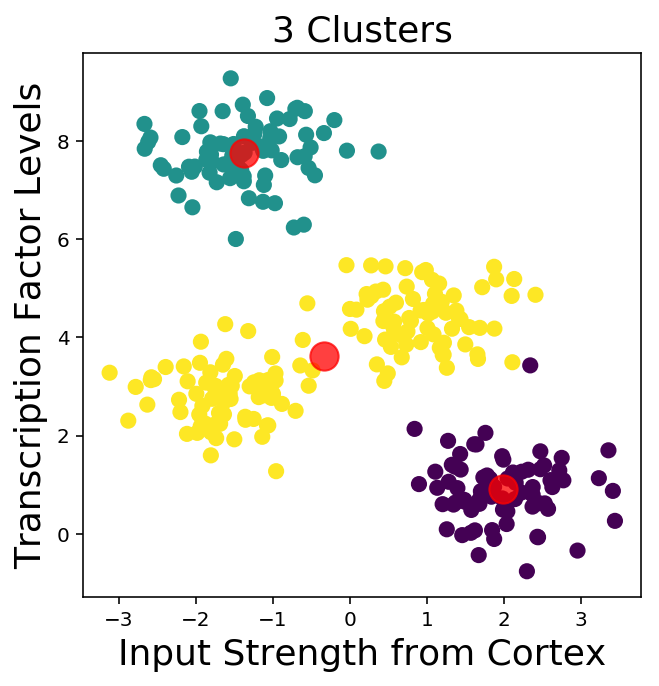

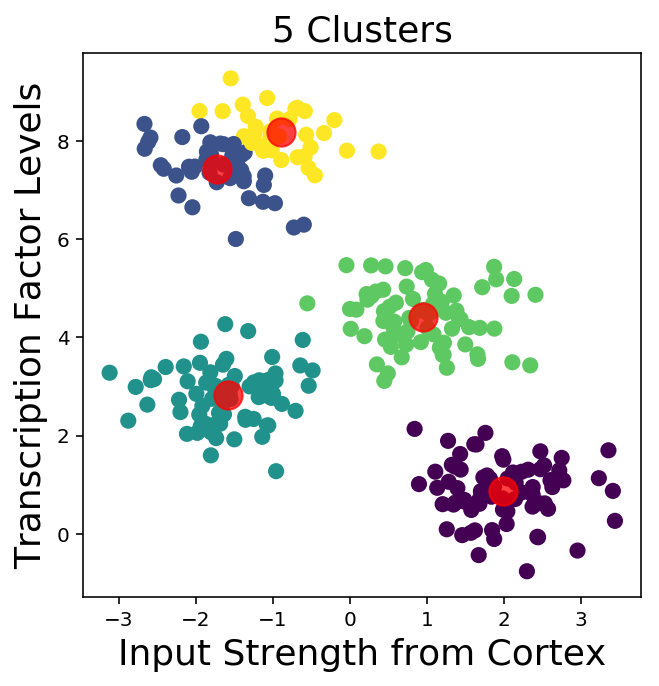

In [27]:
for n in [3, 5]:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(xy)
    klabels = kmeans.predict(xy)
    
    plt.figure()
    plt.scatter(xy[:,0], xy[:,1], s=50, c=klabels, cmap='viridis');
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, alpha=0.75);
    plt.xlabel('Input Strength from Cortex')
    plt.ylabel('Transcription Factor Levels')
    plt.title(f'{n} Clusters');

## What if we have more noise?

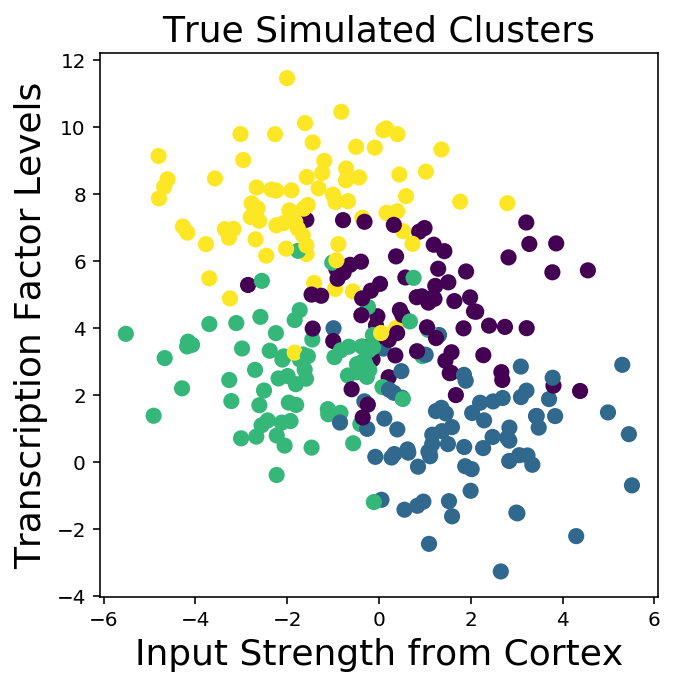

In [107]:
noisy, labels = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=0)

plt.figure()
plt.scatter(noisy[:,0], noisy[:,1], s=50, c=labels, cmap='viridis');
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('True Simulated Clusters');

## <font color=red>Exercises</font>

1. Cluster the above noisy data into 4 clusters using $k$-means.

In [ ]:
# Create a KMeans object for 4 clusters...
kmeans = ...

# Cluster the noisy data above using the KMeans object you just created..
...

# Get the cluster label of each data point...
klabels = ...

plt.figure()
plt.scatter(noisy[:,0], noisy[:,1], s=50, c=klabels, cmap='viridis');
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, alpha=0.75);
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('$k$-means Cluster Prediction');

![kmeans boundaries](images/sphx_glr_plot_kmeans_digits_0011.png "kmeans boundaries")

## $k$-means can only fit round blobs. For anything else you'll need a different algorithm.

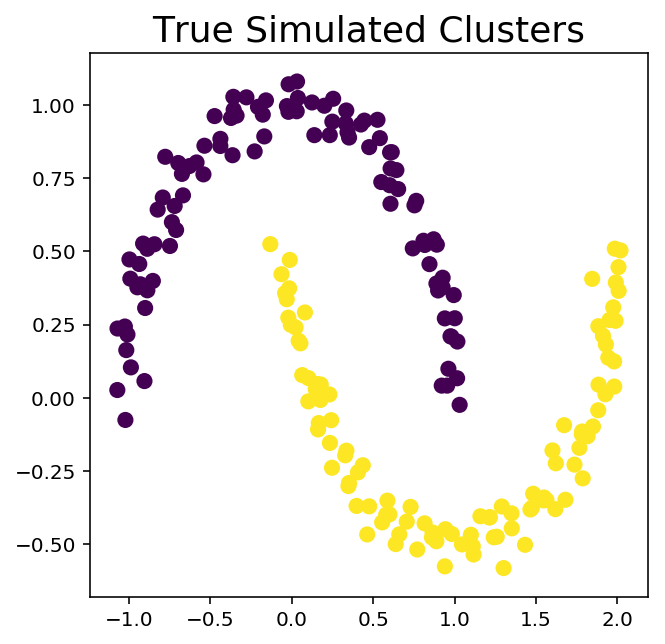

In [33]:
from sklearn.datasets import make_moons

moons, labels = make_moons(200, noise=.05, random_state=0)

plt.scatter(moons[:,0], moons[:,1], c=labels, s=50, cmap='viridis');
plt.title('True Simulated Clusters');

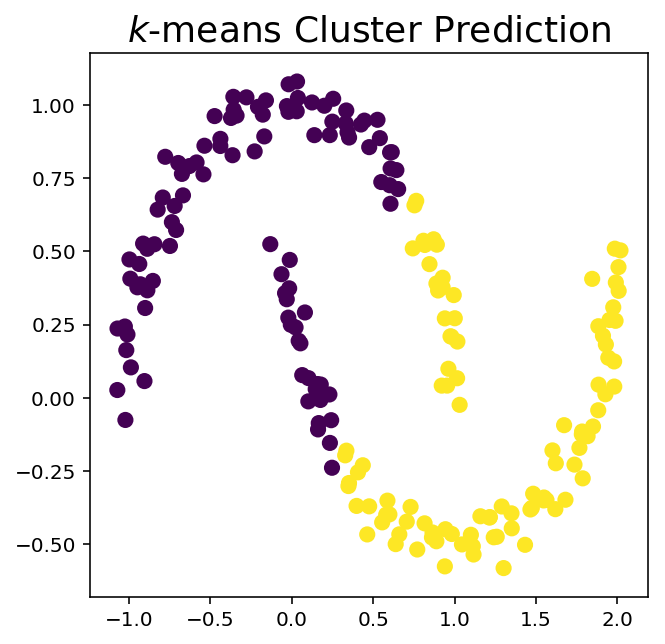

In [34]:
klabels = KMeans(2, random_state=0).fit_predict(moons)

plt.scatter(moons[:,0], moons[:,1], c=klabels, s=50, cmap='viridis');
plt.title('$k$-means Cluster Prediction');

---
## Other clustering algorithms may be better suited to different types of data.

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


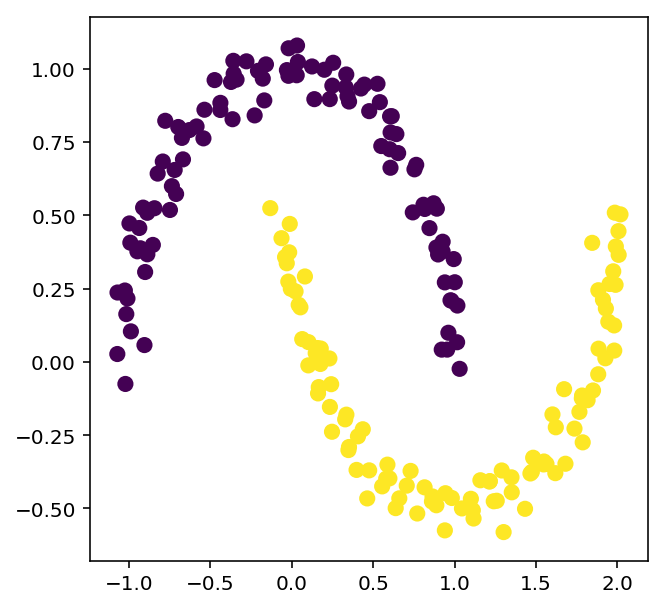

In [36]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

slabels = model.fit_predict(moons)

plt.scatter(moons[:,0], moons[:,1], c=slabels, s=50, cmap='viridis');

---
## No clustering algorithm is perfect for everything. You'll have to assess the pros and cons based on your data.

Here are examples of how several algorithms perform on various types of data.

Some handy info on these methods at https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

Code at https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

![clustering algorithms](images/sphx_glr_plot_cluster_comparison_0011.png "Clustering Algorithms")

---
# Mean-Shift clustering

* Will automatically find the optimal number of clusters.
* Result highly dependent on size of blob used.

## How mean shift clustering works:

1. Start at a random point and specify a radius around that point.
2. Move to the mean of all the points within the specified radius.
3. Repeat 1-2 until converged (point no longer moves).

![mean-shift single window](images/mean-shift_single_window.gif "Mean-Shift Single Window")

* For multiple clusters, start with a grid of points spaced over the entire data.
* Points that converge to locations within their radii are merged.
* Thus, you don't have to specify the numer of clusters, the algorithm will attempt to find the optimal number.
* !!! However, results depend on the selected radius.

![mean-shift many windows](images/mean-shift_many_windows.gif "Mean-Shift Many Windows")

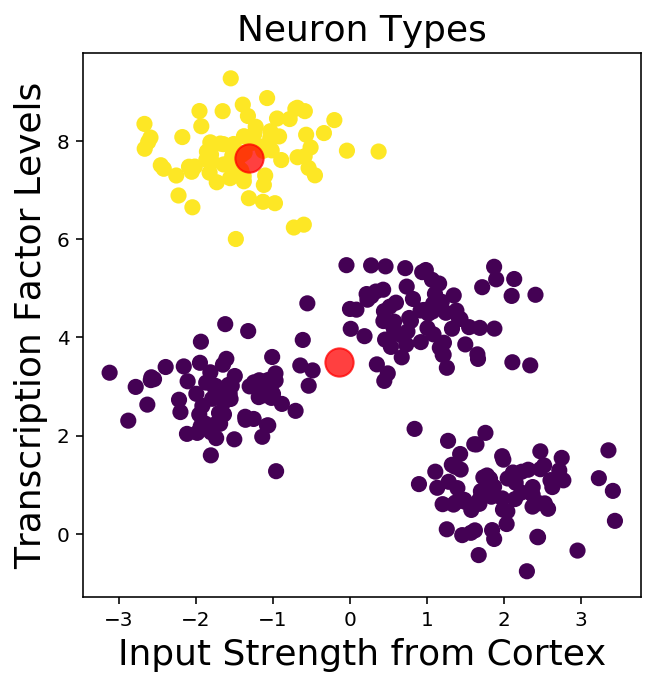

In [39]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(xy)

plt.scatter(xy[:,0], xy[:,1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:,0], ms.cluster_centers_[:,1], c='red', s=200, alpha=0.75);
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('Neuron Types');

## Size of the shifting blob matters a lot!

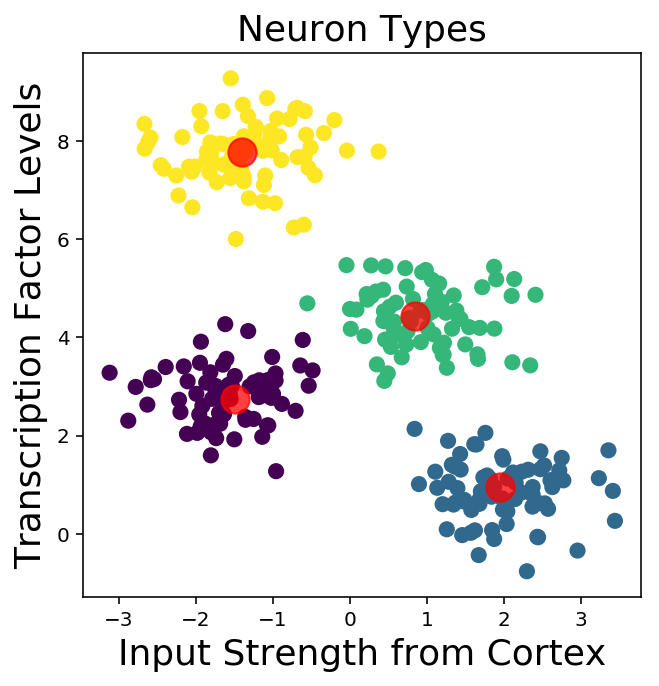

In [40]:
ms = MeanShift(bandwidth=1)
ms.fit(xy)

plt.scatter(xy[:, 0], xy[:, 1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('Neuron Types');

## Estimating the blob size to use based on pairwise distances in the data...

1.4289741801666231


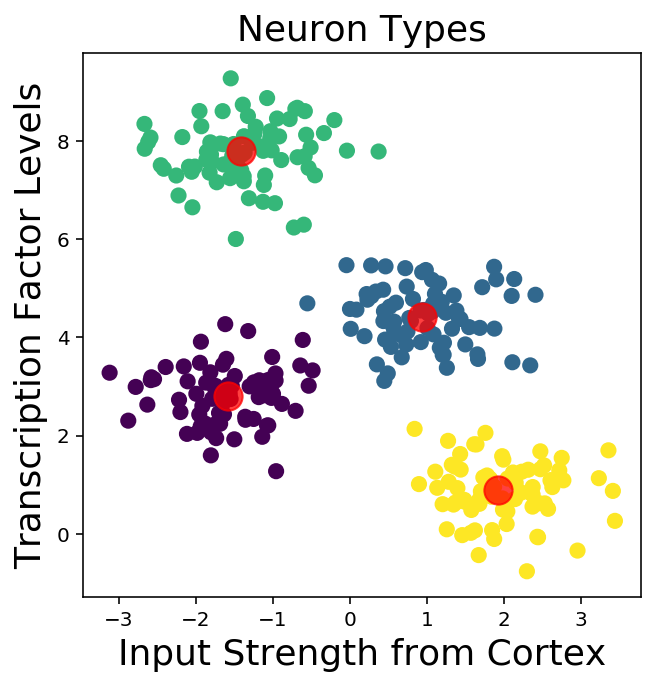

In [49]:
from sklearn.cluster import estimate_bandwidth

# bandwidth estimated from 20% quantile of all pairwise distances
bandwidth = estimate_bandwidth(xy, quantile=0.2)

print(bandwidth)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(xy)

plt.scatter(xy[:,0], xy[:,1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('Neuron Types');

## What if we have more noise?

2.545993523104276


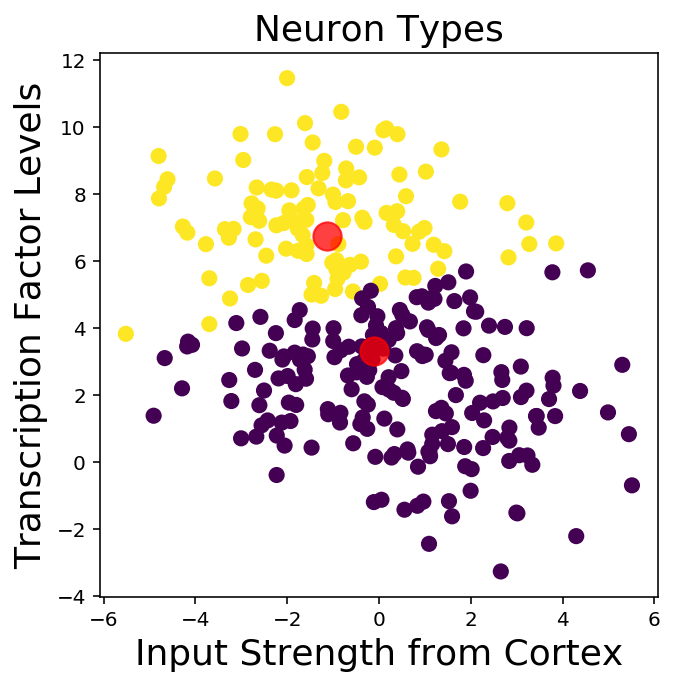

In [56]:
bandwidth = estimate_bandwidth(noisy, quantile=0.2)

print(bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(noisy)

plt.scatter(noisy[:,0], noisy[:,1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:,0], ms.cluster_centers_[:,1], c='red', s=200, alpha=0.75);
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('Neuron Types');

## <font color=red>Exercises</font>

1. Cluster the above noisy data using the mean shift algorithm. Set the bandwith based on the 10% quantile of all pariwise distances in the data.

In [ ]:
# Estimate the bandwith based on the 10% quantile of pairwise distances in the data...
bandwidth = ...
print(bandwidth)

# Creat a MeanShift object with the bandwith above...
# Also set bin_seeding=True to use a grid of starting points rather than starting from each data point.
ms = ...

# Cluster the noisy data using the MeanShift object you created above...
...

plt.scatter(noisy[:,0], noisy[:,1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:,0], ms.cluster_centers_[:,1], c='red', s=200, alpha=0.75);
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('Neuron Types');

---
# Gaussian Mixture Model (GMM)

* Need to specify the number of clusters.
* Unlike $k$-means which can only handle round (e.g. circular) blobs, GMMs can fit eliptical blobs.
* Each data point can belong to multiple clusters with a certain probability to be in each cluster (i.e. clusters can overlap).

![GMM](images/gmm.gif "GMM")

![overlap clusters](images/overlapping_gaussians.png "Overlapping Clusters")

![overlap GMM](images/overlapping_gaussians2.png "Overlapping GMM")

## Some simulated elliptical blobs...

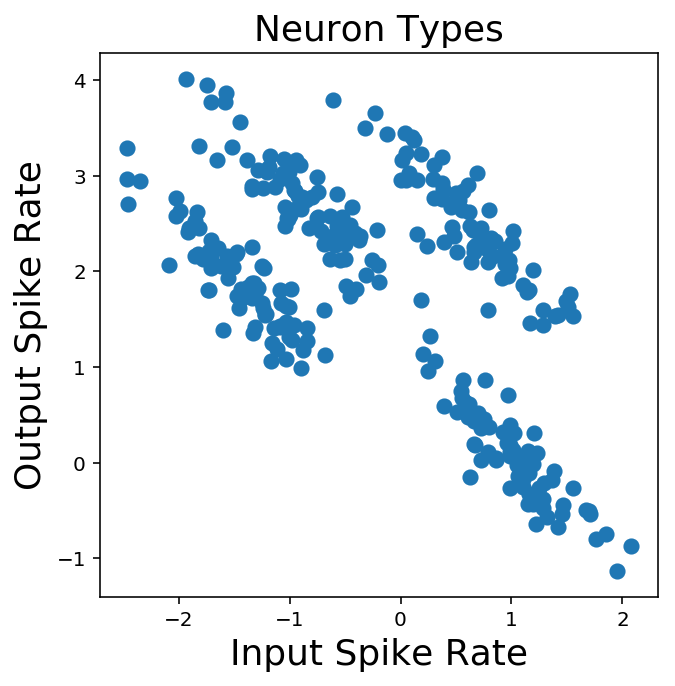

In [59]:
rng = np.random.RandomState(13)

stretched = xy @ rng.randn(2, 2)

plt.scatter(stretched[:, 0], stretched[:, 1], s=50);
plt.xlabel('Input Spike Rate')
plt.ylabel('Output Spike Rate')
plt.title('Neuron Types');

## $k$-means only good for round blobs, not elliptical blobs...

## <font color=red>Exercises</font>

1. Cluster the above stretched data using $k$-means with 4 clusters.

In [ ]:
# Creat a KMeans object for 4 clusters...
kmeans = ...

# Cluster the stretched data...
...

# Get the cluster label for each data point...
klabels = ...

plt.scatter(stretched[:,0], stretched[:,1], s=50, c=klabels, cmap='viridis');
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, alpha=0.75);
plt.xlabel('Input Spike Rate')
plt.ylabel('Output Spike Rate')
plt.title('Neuron Types');

## Gaussians can be skewed to match an elliptical shape...

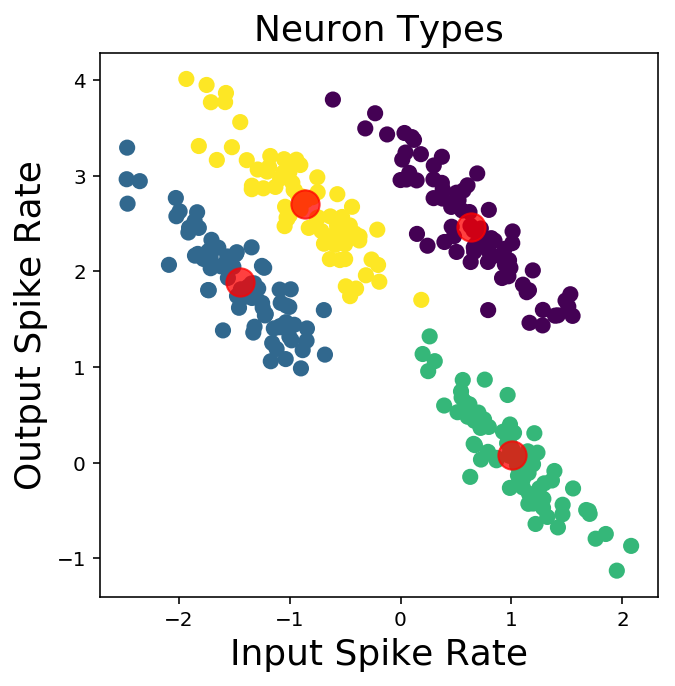

In [63]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=5)
gmm.fit(stretched)
glabels = gmm.predict(stretched)

plt.scatter(stretched[:,0], stretched[:,1], s=50, c=glabels, cmap='viridis');
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c='red', s=200, alpha=0.75);
plt.xlabel('Input Spike Rate')
plt.ylabel('Output Spike Rate')
plt.title('Neuron Types');

In [64]:
gmm.converged_

True

## Some simulated overlapping elliptical blobs...

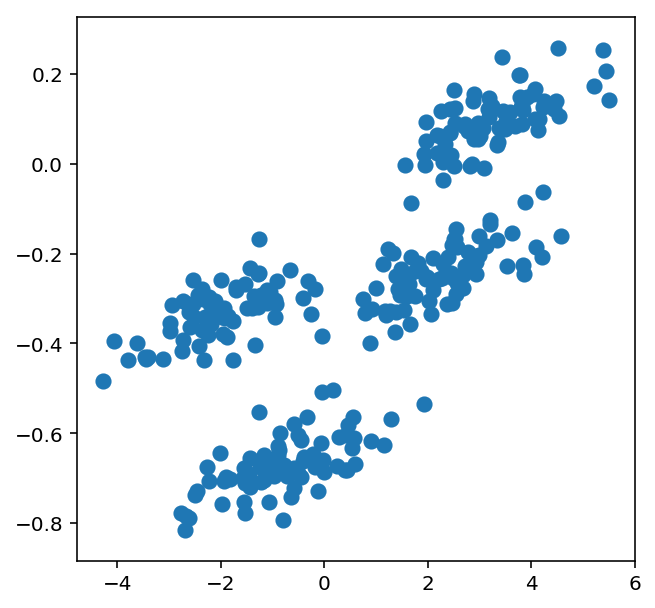

In [65]:
rng = np.random.RandomState(14)

stretched2 = xy @ rng.randn(2, 2)

plt.scatter(stretched2[:, 0], stretched2[:, 1], s=50);

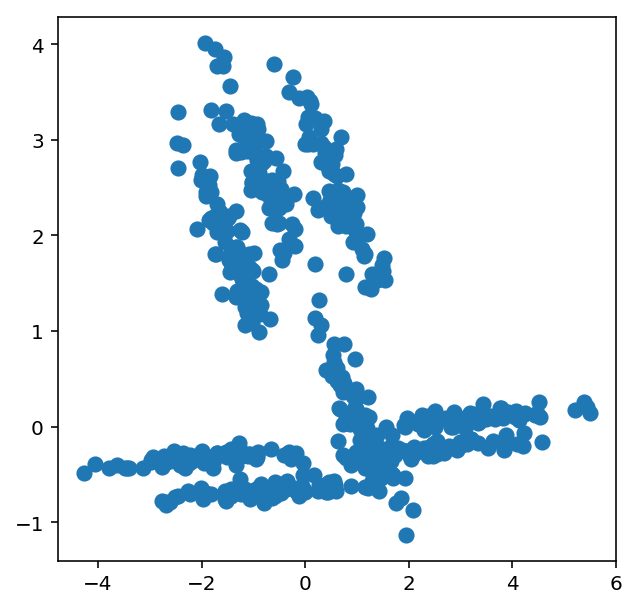

In [66]:
overlapped = np.vstack([stretched, stretched2])

plt.scatter(overlapped[:, 0], overlapped[:, 1], s=50);

## <font color=red>Exercises</font>

1. Cluster the above overlapped data using a GMM with 8 clusters.

In [ ]:
# Creat a GaussianMixture object for 8 clusters...
gmm = ...

# Cluster the overlapped data above...
...

# Get the cluster label for each data point...
glabels = ...

plt.scatter(overlapped[:,0], overlapped[:,1], s=50, c=glabels, cmap='viridis');
plt.xlabel('Input Spike Rate')
plt.ylabel('Output Spike Rate')
plt.title('Neuron Types');

## Visualize both the cluster prediction (color) and the probability of being in the predicted cluster (size).

In [68]:
# Probability that each point belongs to each of the 8 clusters.
probs = gmm.predict_proba(overlapped)

probs[:9,:].round(3)

array([[0.002, 0.972, 0.   , 0.   , 0.   , 0.026, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.001, 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.2  , 0.   , 0.   , 0.   , 0.   , 0.   , 0.681, 0.119],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ]])

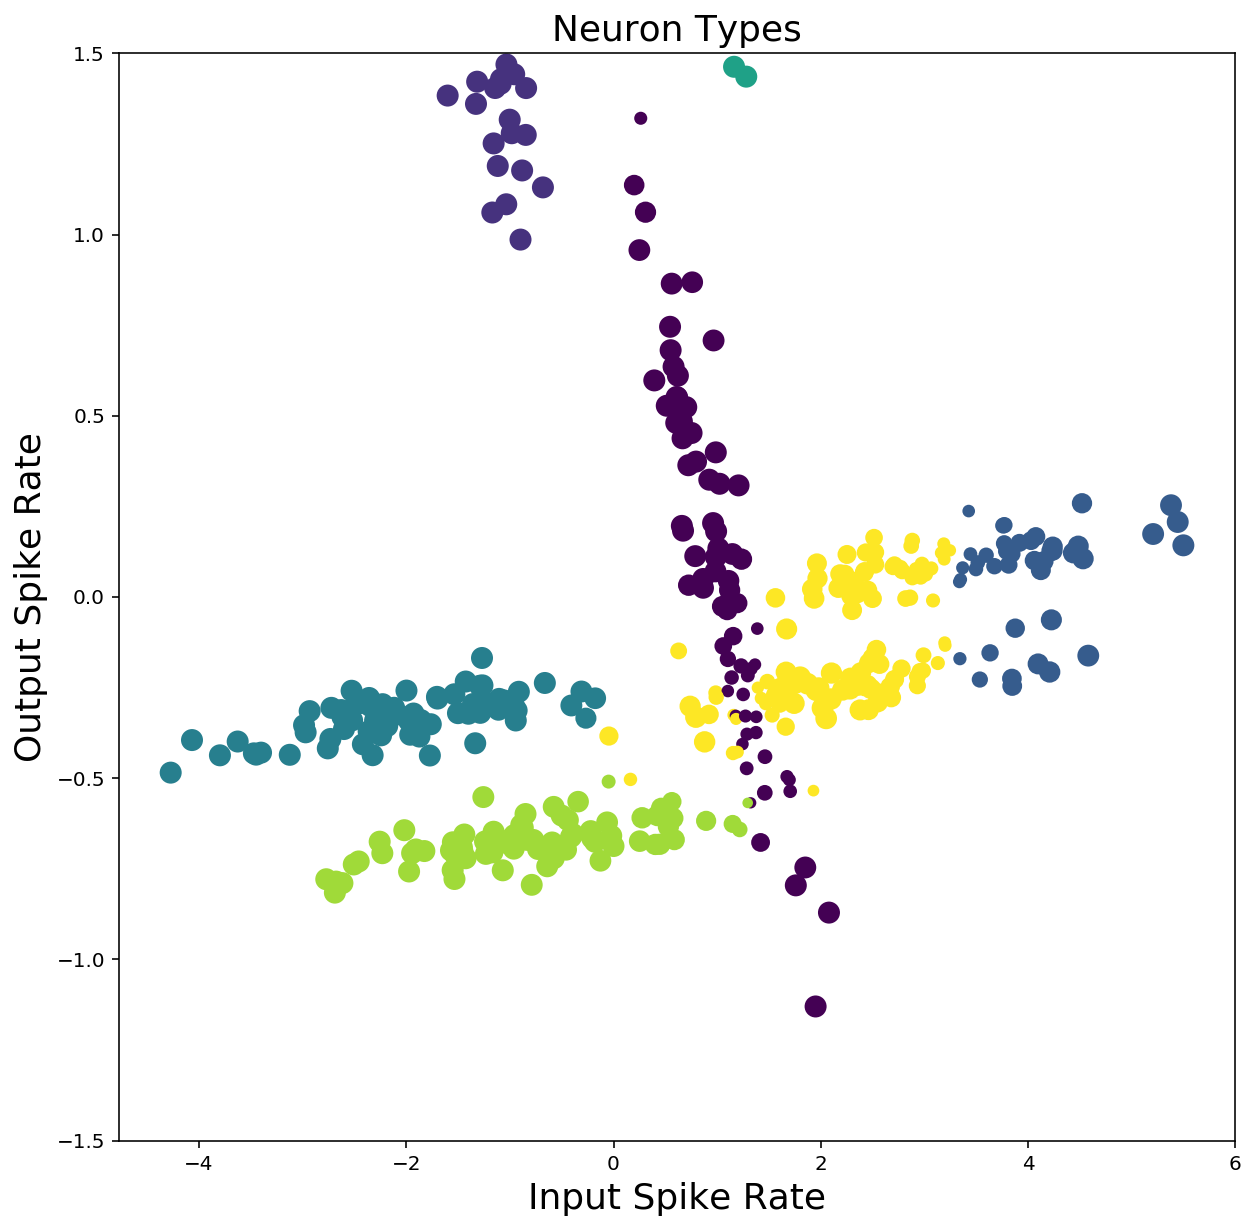

In [69]:
size = 100 * probs.max(axis=1)**2  # square emphasizes differences

plt.figure(figsize=(10, 10))
plt.scatter(overlapped[:, 0], overlapped[:, 1], s=size, c=glabels, cmap='viridis');
plt.ylim([-1.5, 1.5]);
plt.xlabel('Input Spike Rate')
plt.ylabel('Output Spike Rate')
plt.title('Neuron Types');

---
# Heirarchical Agglomerative clustering

Start with all data points in separate clusters and iteravely combine the closest clusters together. 

![HAC](images/hac.gif "HAC")

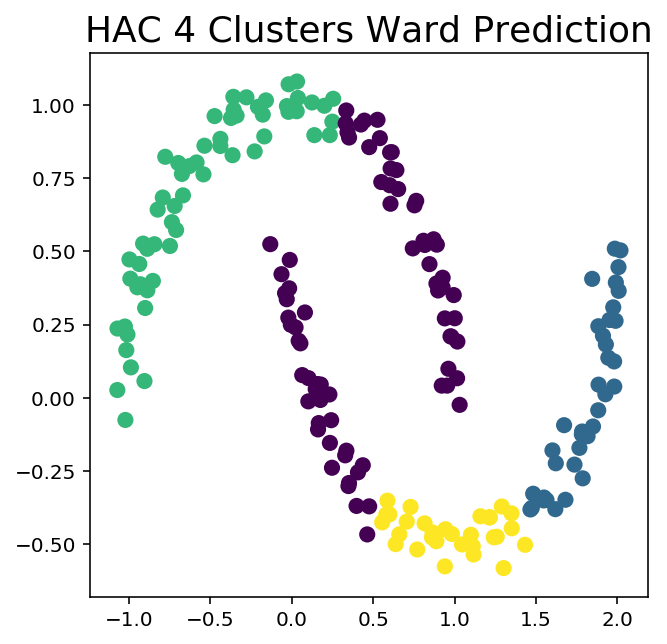

In [75]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hlabels = hac.fit_predict(moons)

plt.scatter(moons[:,0], moons[:,1], c=hlabels, s=50, cmap='viridis');
plt.title('HAC 4 Clusters Ward Prediction');

* **affinity**: How to compute distances.
    * **euclidean** is the standard measure of distance you are all familiar with.
    * **manhattan** is distance on a grid like walking city blocks
    * etc.
* **linkage**: How to decide wich two clusters to merge next. Always choose to merge the two clusters that minimize the linkage.
    * **ward** minimizes the variance of the clusters being merged.
    * **average** uses the average of the distances of each observation of the two sets.
    * **complete** or maximum linkage uses the maximum distances between all observations of the two sets.
    * **single** uses the minimum of the distances between all observations of the two sets.

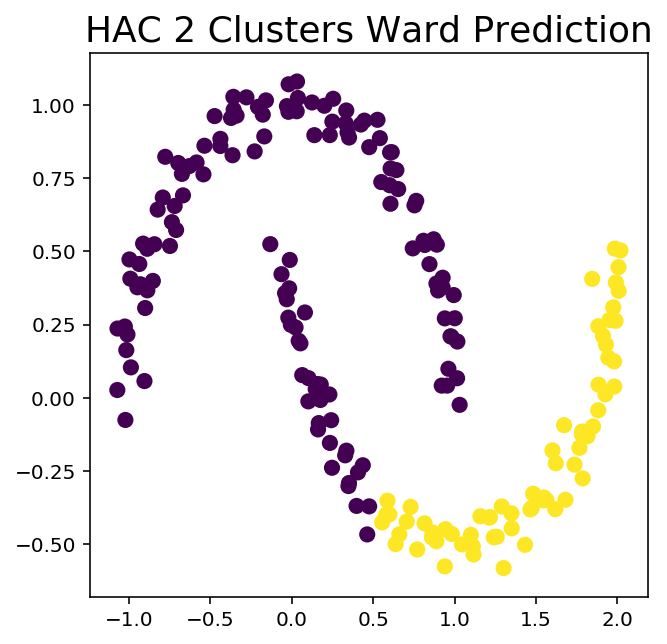

In [76]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hlabels = hac.fit_predict(moons)

plt.scatter(moons[:,0], moons[:,1], c=hlabels, s=50, cmap='viridis');
plt.title('HAC 2 Clusters Ward Prediction');

## <font color=red>Exercises</font>

1. Cluster the above moons data using HAC with 2 clusters, 'euclidean' affinity and 'single' linkage.

In [ ]:
# Create an AgglomerativeClustering object for 2 clusters with affinity='euclidean', linkage='single'
hac = ...

# Cluster the moons data using the above AgglomerativeClustering object...
...

# Get the cluster label for each data point...
hlabels = ...

plt.scatter(moons[:,0], moons[:,1], c=hlabels, s=50, cmap='viridis');
plt.title('HAC 2 Clusters Single Prediction');

## Heirarchical Agglomeratice Clustering Dendrogram

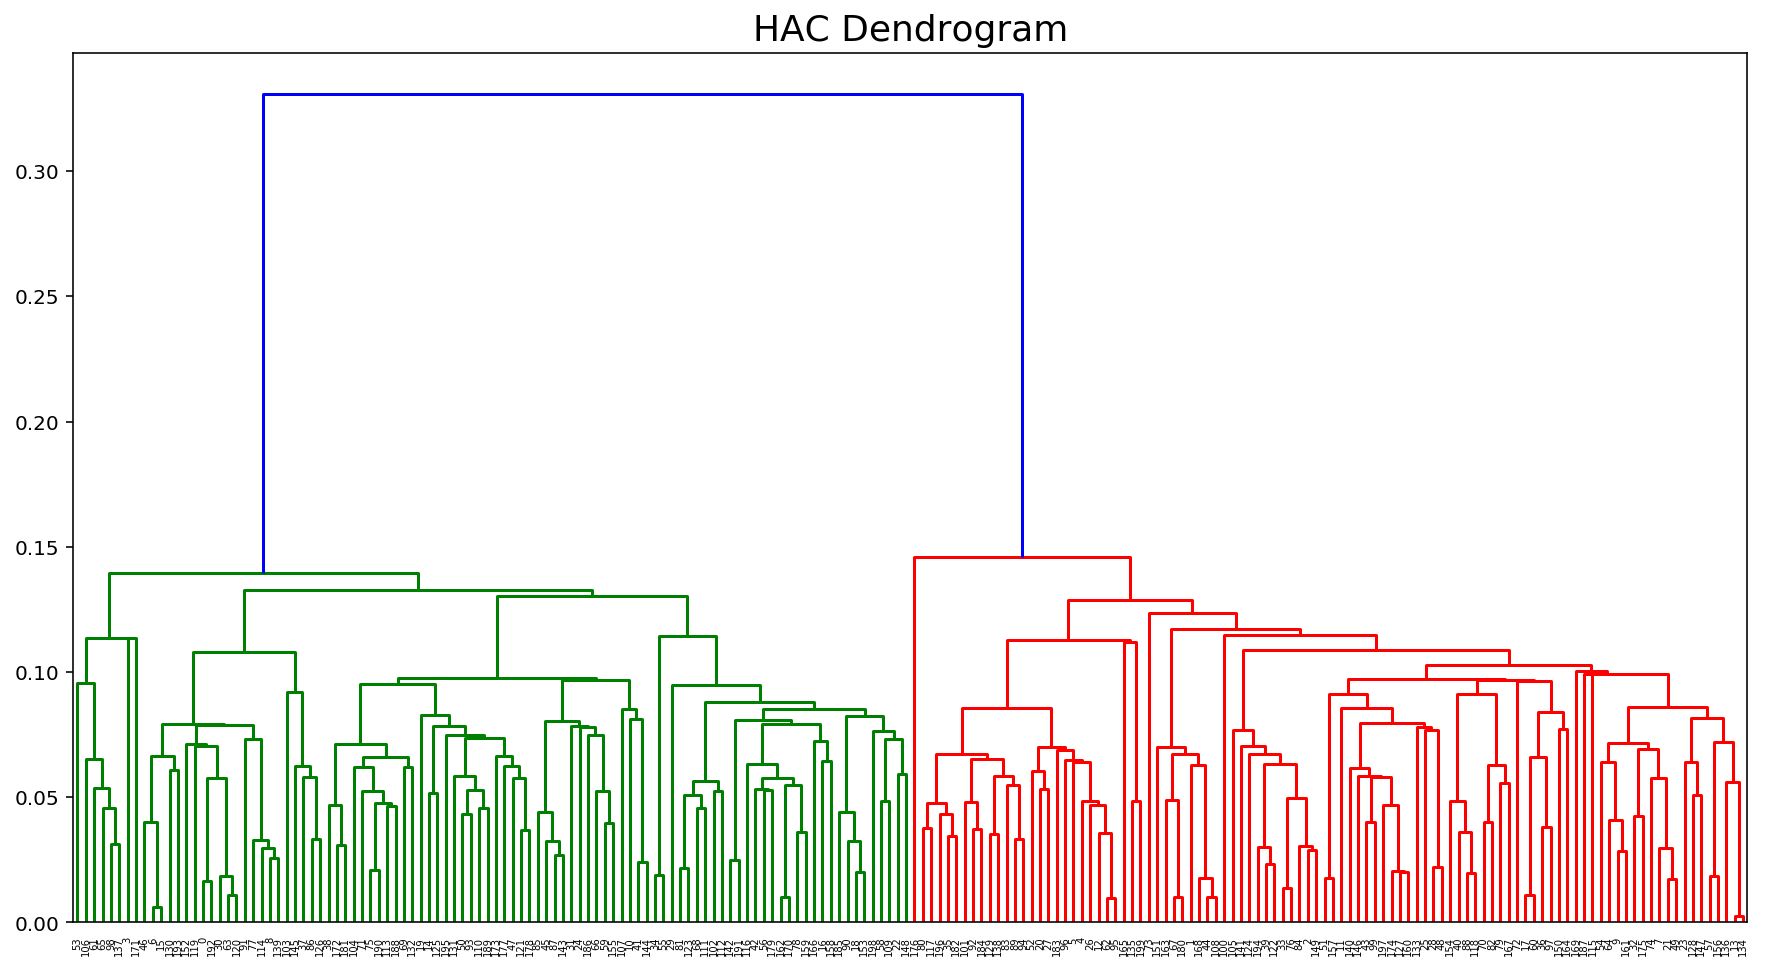

In [110]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 8))
sch.dendrogram(sch.linkage(moons, method='single'));
plt.title('HAC Dendrogram');

---
# Density-Based Spatial Clustering (DBSCAN)

![DBSCAN](images/dbscan.gif "DBSCAN")

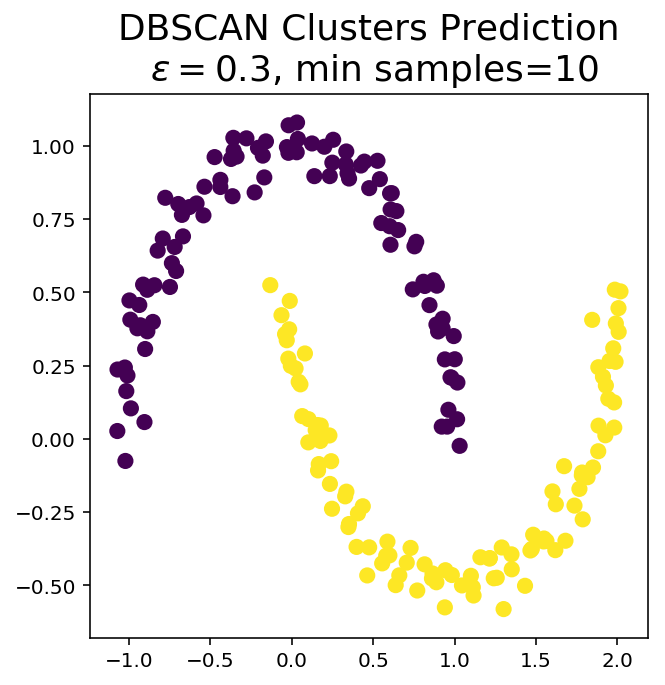

In [98]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10)
db.fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=db.labels_, s=50, cmap='viridis');
plt.title('DBSCAN Clusters Prediction\n $\epsilon=0.3$, min samples=10');

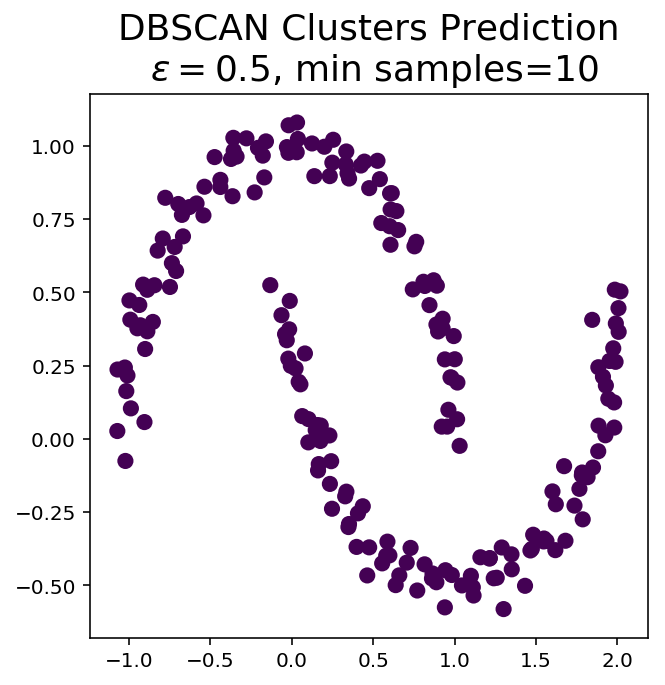

In [99]:
db = DBSCAN(eps=0.5, min_samples=10)
db.fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=db.labels_, s=50, cmap='viridis');
plt.title('DBSCAN Clusters Prediction\n $\epsilon=0.5$, min samples=10');

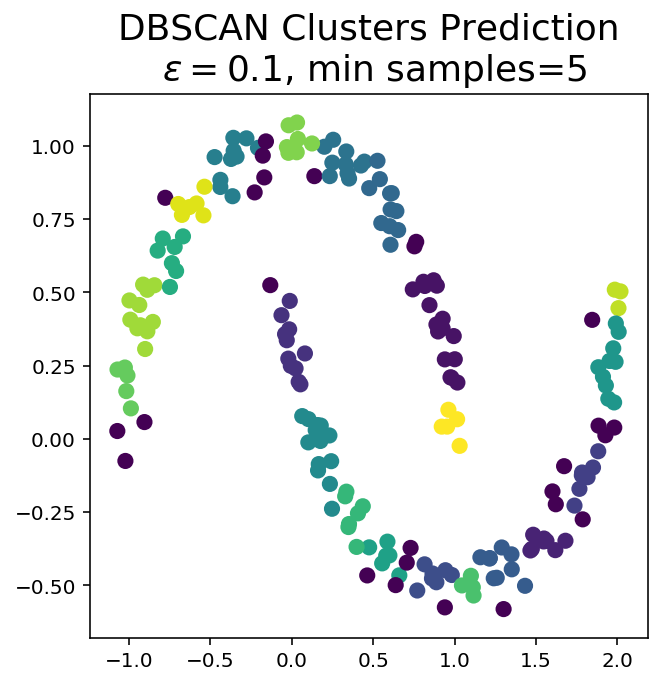

In [100]:
db = DBSCAN(eps=0.1, min_samples=5)
db.fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=db.labels_, s=50, cmap='viridis');
plt.title('DBSCAN Clusters Prediction\n $\epsilon=0.1$, min samples=5');

## What about some noisy outliers?

## If you're not sure, do you still have to assign them to a cluster?

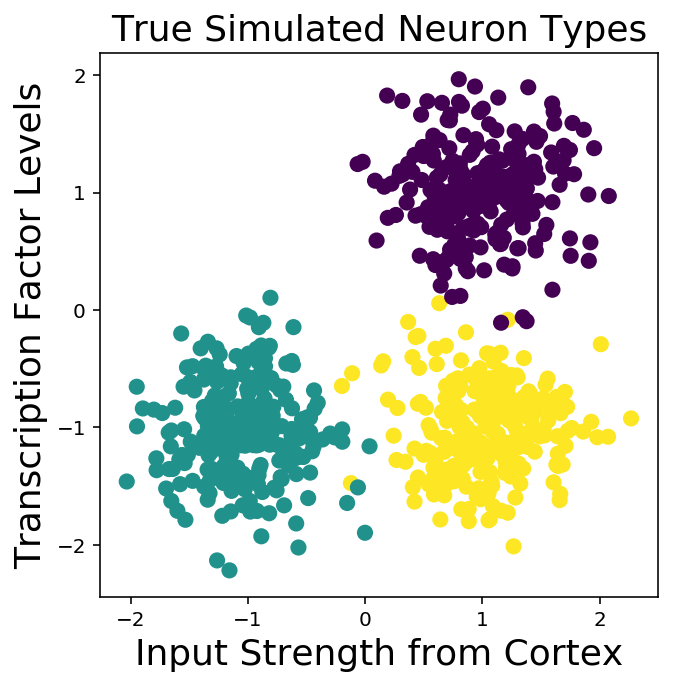

In [96]:
centers = [[1, 1], [-1, -1], [1, -1]]
blobs, labels = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

plt.scatter(blobs[:,0], blobs[:,1], c=labels, s=50, cmap='viridis');
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('True Simulated Neuron Types');

## <font color=red>Exercises</font>

1. Cluster the above blobs data using DBSCAN with $\epsilon=0.3$ and a minimum of 10 samples per cluster.

In [ ]:
# Create a DBSCAN object with eps=0.3 and min_samples=10...
db = ...

# Cluster the blobs data...
...

# We don't need to explicitly get the cluster labels for each data point.
# They are already stored in db.labels_

plt.scatter(blobs[:,0], blobs[:,1], c=db.labels_, s=50, cmap='viridis');
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('DBSCAN Predicted Neuron Types\n $\epsilon=0.3$, min samples=10');

In [91]:
set(db.labels_)

{-1, 0, 1, 2}

## Results are highly dependent on the choice of $\epsilon$ and the minimum number of samples per cluster.

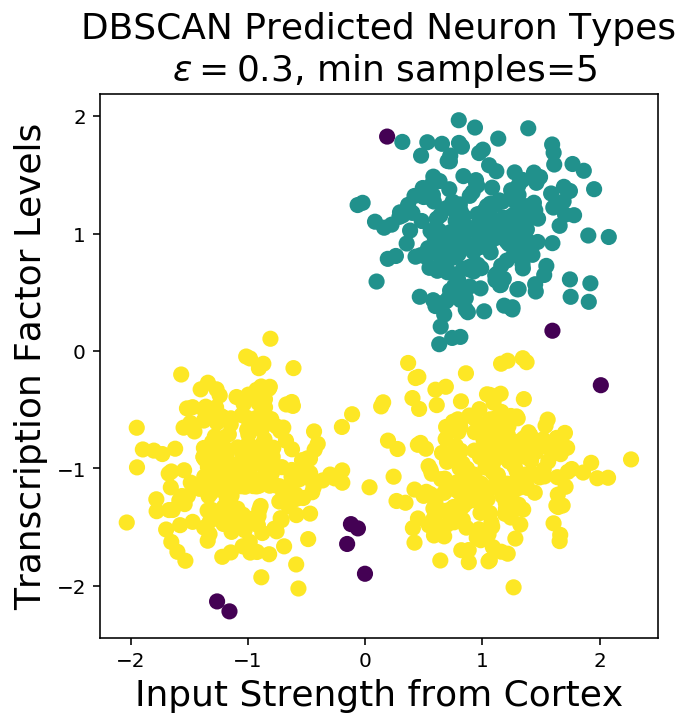

In [102]:
# try changing the eps and min_samples parameters and see how your results change
db = DBSCAN(eps=0.3, min_samples=5)
db.fit(blobs)

plt.scatter(blobs[:,0], blobs[:,1], c=db.labels_, s=50, cmap='viridis');
plt.xlabel('Input Strength from Cortex')
plt.ylabel('Transcription Factor Levels')
plt.title('DBSCAN Predicted Neuron Types\n $\epsilon=0.3$, min samples=5');

---
# GMMs: How many components to choose?

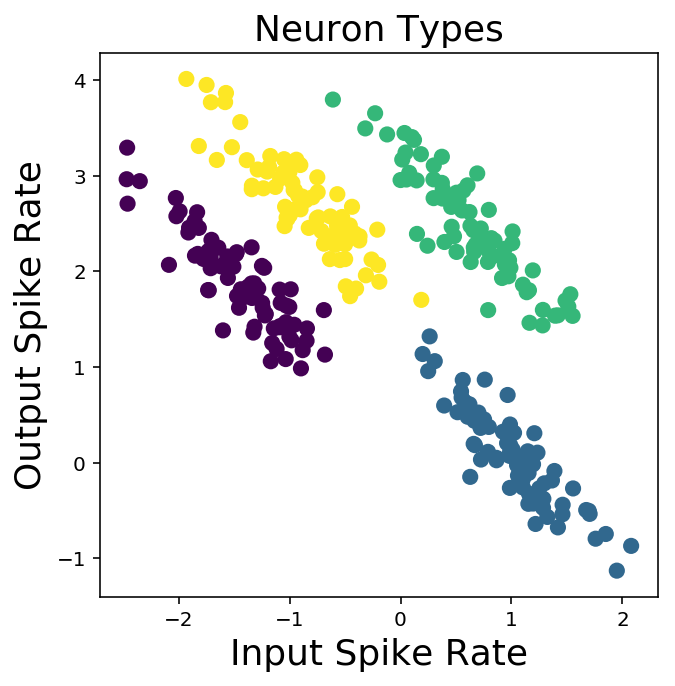

In [103]:
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(stretched)
glabels = gmm.predict(stretched)

plt.scatter(stretched[:,0], stretched[:,1], s=50, c=glabels, cmap='viridis');
plt.xlabel('Input Spike Rate')
plt.ylabel('Output Spike Rate')
plt.title('Neuron Types');

### Objective functions such as Bayesian Information Criterion (BIC)

### $BIC = ln(n) * k - 2 * ln(L)$

* $k$ = number of model parameters (Gaussian centers, standard deviations, and rotations)
* $n$ = number of data points
* $L$ = likelihood of the model given the data

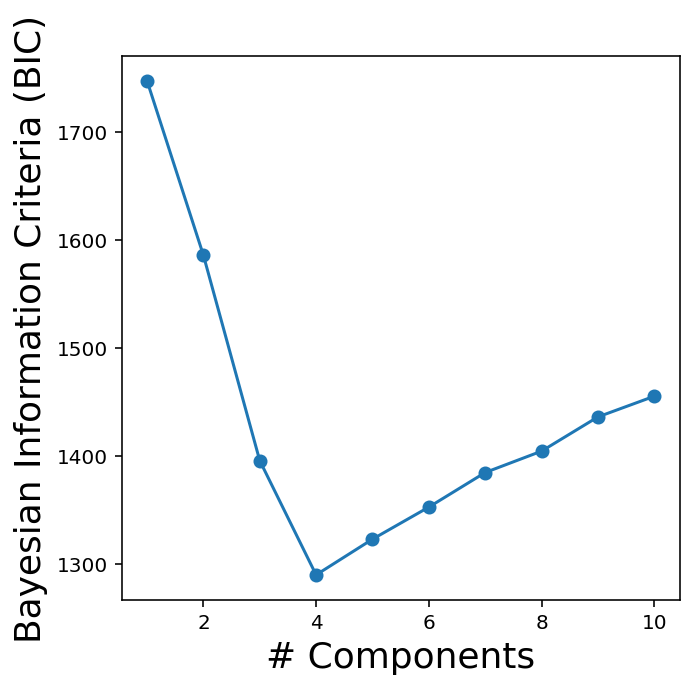

In [104]:
n_components = np.arange(1, 11)

models = [GaussianMixture(n, random_state=0) for n in n_components]

for model in models:
    model.fit(stretched)

bic = [model.bic(stretched) for model in models]

plt.plot(n_components, bic, 'o-', label='BIC')
plt.xlabel('# Components');
plt.ylabel('Bayesian Information Criteria (BIC)');